In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import json

## Multi-Class Multi-Output Classification

In [2]:
l2=pd.read_csv("FinalDataset/URL/DefacementSitesURLFiltered.csv", header=None)
l2['result'] = [1 for _ in range(l2.shape[0])]
l2['type'] = 'Defacement'
l2

,0,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
96452,http://www.laurenzano.com.ar/index.php?option=...,1,Defacement
96453,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96454,http://www.laurenzano.com.ar/templates/laurenz...,1,Defacement
96455,http://www.laurenzano.com.ar/x.txt,1,Defacement


In [3]:
l3=pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l3['result'] = [2 for _ in range(l3.shape[0])]
l3['type'] = 'Malware'
l3

,0,result,type
0,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
1,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
2,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
3,http://gzzax.livechatvalue.com/chat/chatClient...,2,Malware
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,2,Malware
...,...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,2,Malware
11562,http://www.plastischechirurgie.net/haartranspl...,2,Malware
11563,http://www.plastischechirurgie.net/korper/gyna...,2,Malware
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,2,Malware


In [4]:
l4=pd.read_csv("FinalDataset/URL/phishing_dataset.csv", header=None)
l4['result'] = [3 for _ in range(l4.shape[0])]
l4['type'] = 'Phishing'
l4

,0,result,type
0,http://v2.email-marketing.adminsimple.com/trac...,3,Phishing
1,http://bid.openx.net/json?amp;amp;amp;amp;cid;...,3,Phishing
2,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
3,http://www.google.com.ng/imgres?imgurl=http://...,3,Phishing
4,http://webmail2.centurytel.net/hwebmail/servic...,3,Phishing
...,...,...,...
9960,http://highedgesolar.com/nw/includes/,3,Phishing
9961,http://jimfangimporters.yolasite.com/,3,Phishing
9962,http://liuheng.chengxuren.com/Images/,3,Phishing
9963,http://mcnaotempreco.net/site/portal/,3,Phishing


In [5]:
l5=pd.read_csv("FinalDataset/URL/spam_dataset.csv", header=None)
l5['result'] = [4 for _ in range(l5.shape[0])]
l5['type'] = 'Spam'
l5

,0,result,type
0,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
1,http://archive.salisburyjournal.co.uk/2007/3/6...,4,Spam
2,http://appbasic.jettons.co.uk/links/index.html,4,Spam
3,http://archive.yorkpress.co.uk/2003/11/6/25684...,4,Spam
4,http://acard4u.co.uk/product_reviews.php?cPath...,4,Spam
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


In [6]:
data=[l2,l3,l4,l5]
urls = pd.concat(data)
urls = urls.rename({0: 'url'}, axis=1)
urls
urls

,url,result,type
0,http://www.sinduscongoias.com.br/index.html,1,Defacement
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement
...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam


<AxesSubplot:xlabel='type', ylabel='count'>

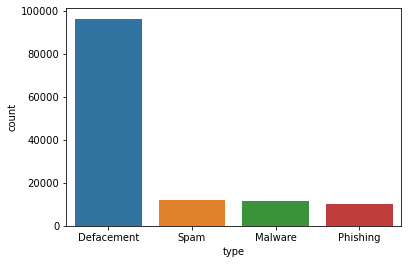

In [7]:
sns.countplot(x = 'type', data = urls, order = urls['type'].value_counts().index)

In [8]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

In [9]:
urls['lengthOfURL']=urls['url'].apply(lambda i: len(str(i)))
urls['lengthOfHostname']=urls['url'].apply(lambda i: len(urlparse(i).netloc))
urls['lengthOfPath']=urls['url'].apply(lambda i: len(urlparse(i).path))
urls['tld'] = urls['url'].apply(lambda i: get_tld(i,fail_silently=True))
urls['lengthOfTLD'] = urls['tld'].apply(lambda i: tld_length(i))
urls=urls.drop(columns=['tld'])
urls['Tally(dir)'] = urls['url'].apply(lambda i: directories(i))
urls['Tally(digits)']= urls['url'].apply(lambda i: digit(i))
urls['Tally(letters)']= urls['url'].apply(lambda i: letter(i))
urls['IP'] = urls['url'].apply(lambda i: ip_address(i))
urls['Tally(.)'] = urls['url'].apply(lambda i: i.count('.'))
urls['Tally(-)'] = urls['url'].apply(lambda i: i.count('-'))
urls['Tally(@)'] = urls['url'].apply(lambda i: i.count('@'))
urls['Tally(%)'] = urls['url'].apply(lambda i: i.count('%'))
urls['Tally(=)'] = urls['url'].apply(lambda i: i.count('='))
urls['Tally(/)'] = urls['url'].apply(lambda i: i.count('/'))
urls['Tally(?)'] = urls['url'].apply(lambda i: i.count('?'))
urls['Tally(+)'] = urls['url'].apply(lambda i: i.count('+'))
urls['Tally(//)'] = urls['url'].apply(lambda i: i.count('//'))

In [10]:
urls

,url,result,type,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),Tally(letters),IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,http://www.sinduscongoias.com.br/index.html,1,Defacement,43,25,11,6,1,0,35,0,4,0,0,0,0,3,0,0,1
1,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement,58,25,26,6,2,1,47,0,5,0,0,0,0,4,0,0,1
2,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement,66,25,34,6,3,0,56,0,4,0,0,0,0,5,0,0,1
3,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement,65,25,33,6,3,0,55,0,4,0,0,0,0,5,0,0,1
4,http://www.sinduscongoias.com.br/index.php/ins...,1,Defacement,109,25,77,6,3,0,92,0,4,7,0,0,0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,http://archive.salisburyjournal.co.uk/2001/3/7/,4,Spam,47,30,10,5,4,6,31,0,3,0,0,0,0,6,0,0,1
11996,http://astore.amazon.co.uk/allezvinsfrenchr/de...,4,Spam,81,19,55,5,4,23,46,0,3,2,0,0,0,6,0,0,1
11997,http://archive.thisischeshire.co.uk/2000/1/14/...,4,Spam,57,28,22,5,4,13,33,0,4,0,0,0,0,6,0,0,1
11998,http://applerugs.co.uk/rugs/product_info.php?p...,4,Spam,116,15,22,5,2,25,73,0,3,0,0,0,4,4,3,0,1


In [19]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [18]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'weighted'),
           'recall': make_scorer(recall_score, average = 'weighted'),
           'f1': make_scorer(f1_score, average = 'weighted')}

In [20]:
scores = cross_validate(clf, urls.drop(columns=['url','result','type']), np.array(urls['result'].tolist()), cv=5,scoring=scoring,return_train_score=True)
scores

{'fit_time': array([3.05719161, 3.43426228, 3.68577266, 3.66394377, 3.95641708]),
 'score_time': array([0.0329113 , 0.02498484, 0.02991843, 0.03901172, 0.04387593]),
 'test_accuracy': array([0.83879529, 0.83233326, 0.84964228, 0.81678655, 0.81197831]),
 'train_accuracy': array([0.83049332, 0.83634965, 0.84059044, 0.84886192, 0.84985239]),
 'test_precision': array([0.82160807, 0.82095622, 0.84457893, 0.78061534, 0.75436841]),
 'train_precision': array([0.81485594, 0.81912075, 0.83172383, 0.84027847, 0.84042506]),
 'test_recall': array([0.83879529, 0.83233326, 0.84964228, 0.81678655, 0.81197831]),
 'train_recall': array([0.83049332, 0.83634965, 0.84059044, 0.84886192, 0.84985239]),
 'test_f1': array([0.8103521 , 0.81072151, 0.82758   , 0.7767259 , 0.7683882 ]),
 'train_f1': array([0.80078877, 0.80963578, 0.81890357, 0.8298133 , 0.83210352])}

In [22]:
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")

The Fit Time is:  3.559517478942871


The Score Time is:  0.03414044380187988


The Train Accuracy score is:  0.8412295437747634


The Train F1 score is:  0.8182489880751789


The Train Precision score is:  0.8292808100173037


The Train Recall score is:  0.8412295437747634


The Test Accuracy score is:  0.8299071372017653


The Test F1 score is:  0.7987535416882627


The Test Precision score is:  0.8044253954947731


The Test Recall score is:  0.8299071372017653




In [23]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [24]:
clf.fit(urls.drop(columns=['url','result','type']), np.array(urls['result'].tolist()))

OneVsRestClassifier(estimator=LogisticRegression())

## Testing

In [25]:
def lengthOfURL(url):
    return len(str(url))

def lengthOfHostname(url):
    return len(urlparse(url).netloc)

def lengthOfPath(url):
    return len(urlparse(url).path)

def tld(url):
    x=get_tld(url,fail_silently=True)
    try:
        return len(x)
    except:
        return -1

def Tally_dot(url):
    return url.count('.')

def Tally_us(url):
    return url.count('-')

def Tally_atr(url):
    return url.count('@')

def Tally_per(url):
    return url.count('%')

def Tally_eq(url):
    return url.count('=')

def Tally_sl(url):
    return url.count('/')

def Tally_qu(url):
    return url.count('?')

def Tally_pl(url):
    return url.count('+')

def Tally_dsl(url):
    return url.count('//')

def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

def parameter(url):
    l=[lengthOfURL(url),lengthOfHostname(url),lengthOfPath(url),tld(url),Tally_dot(url),Tally_us(url),Tally_atr(url),Tally_per(url),
       Tally_eq(url),Tally_sl(url),Tally_qu(url),Tally_pl(url),Tally_dsl(url),directories(url),digit(url),letter(url),ip_address(url)]
    return l

l1=parameter("https://dbs-kartukredit.form.link/dbs/")
print(l1)

p=np.array([l1])

multi_class_prediction = clf.predict(p)

multi_class_prediction_probability = clf.predict_proba(p)


print(multi_class_prediction, multi_class_prediction_probability)

[38, 25, 5, 4, 2, 1, 0, 0, 0, 4, 0, 0, 1, 2, 0, 30, 0]
[4] [[9.92445925e-03 5.66101456e-04 5.51413659e-07 9.89508888e-01]]
